## Missingno package

Missing no package in python provides functions to visualize the patterns and trends in the missing data in python. Although the package might not help us make definite predictions about the missing data and the type of the missing data i.e. MAR, MCAR or MNAR but still it helps tremendously by helping the user understand which coulmns contain the missing data and what the overall trend looks like

Let us begin by installing the package. In python, packages can usually be installed using pip name_of_the_package. Pip is a package manager in python. Since missingno is not an inbuilt library, it will need to be installed using the same

In [1]:
#downloading the missingno package
!pip install missingno


In [3]:
#importing all the neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as mn

In order to a piece of code in your current file, we need to import the same using import statement

Apart from missingno, the libraries imported here helps us deal with aspects of data analysis such as pandas helps us deal with dataframes.
Numpy helps us with array manipulation.
Matplotlib helps us with data visualization.

The dataset that choosen here is the world happiness index dataset, this dataset contains the data from countries around the world and contains the information such as their GDP, Social support, generosity, perception of corruptions etc. The crude assumption behind the dataste is that these factors contribute to the overall happiness 

In [4]:
#loading the dataset into a dataframe called data using the pandas library
data=pd.read_csv("happines_dataset.csv")

In [5]:
#taking a breif look at the data using the head function which gives us the first five rows of the dataset
data.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


In [6]:
#getting all the countries for which we have dataset
countries=data['Country name'].unique()
print(len(countries))

165


As you can see, we have around 165 different countries 

In [7]:
#taking a closer look at the dataset using the .info() function. the info function tells us about the datatypes 
#and the non-null values of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


In [8]:
data.isnull().sum()


Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64

As we can see here, almost all of the columns contain missing data and the percentage of missing data is less than 10%. 

Hence, instead of simply deleting rows a better approach would be to perform imputation using various statistical techniques.

But firstly, let us visualize the data, this is where the missingno comes in picture

# Missing data visualizations using missingno package python

## Missing data matrix

Matrix function in missing data provides a visual matrix of the data where the coloured data indicates complete data and the white lines indicates the missing data. you can also sort the columns based on which ones have the highest missing values

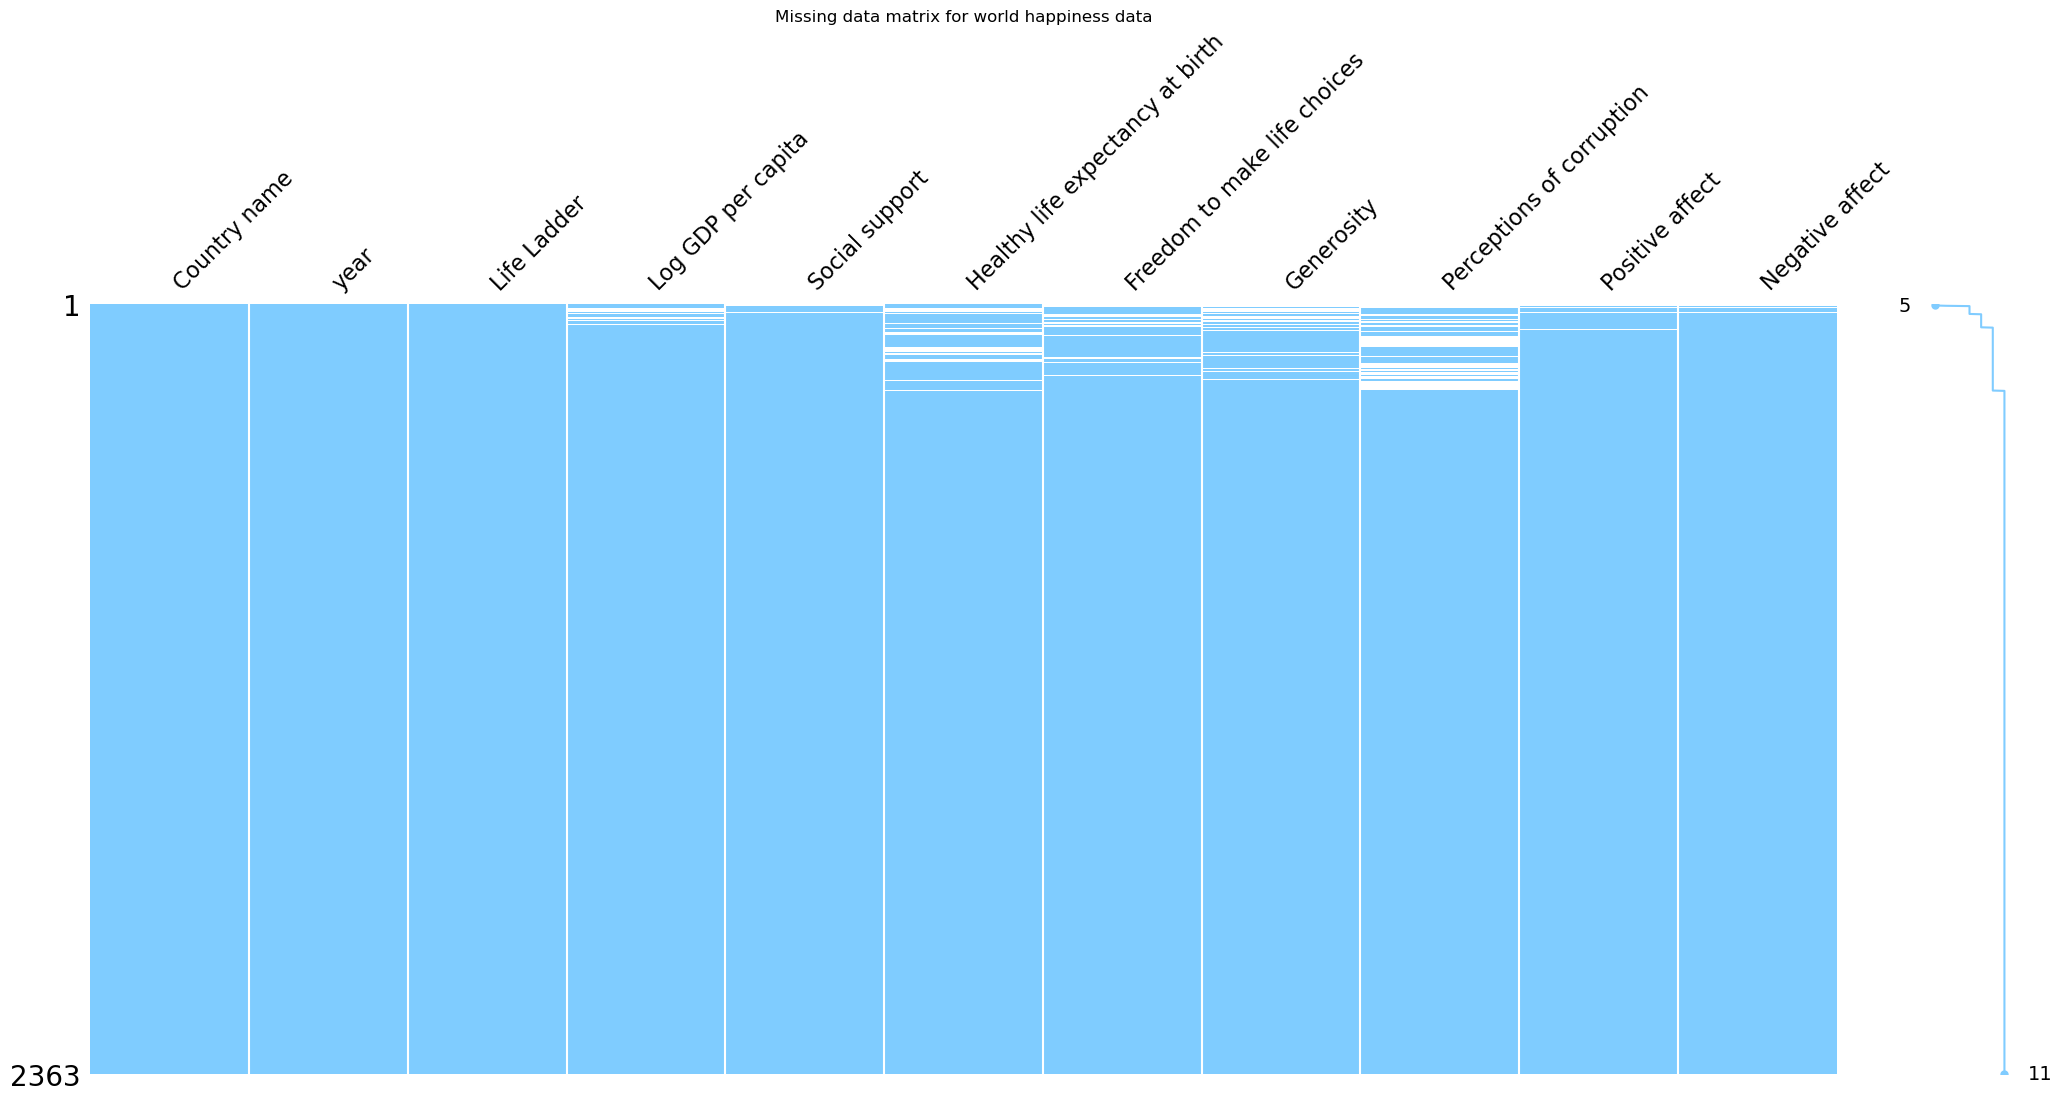

In [31]:
#creating the missing value matrix
%matplotlib inline
mn.matrix(data, sort="ascending",color=(0.5, 0.8, 1.0))
plt.title("Missing data matrix for world happiness data")
plt.show()

As you can see from the figure, healthy life expectancy at birth, perceptions of corruption, freedom to make life choices are the ones which have some missing data

## Barplot

Barplots are the most simple and intutive way to visualize the missing data, they also help with the comparison between variables and are easy to interpet

### The barplot of the missing values across the entire dataframe

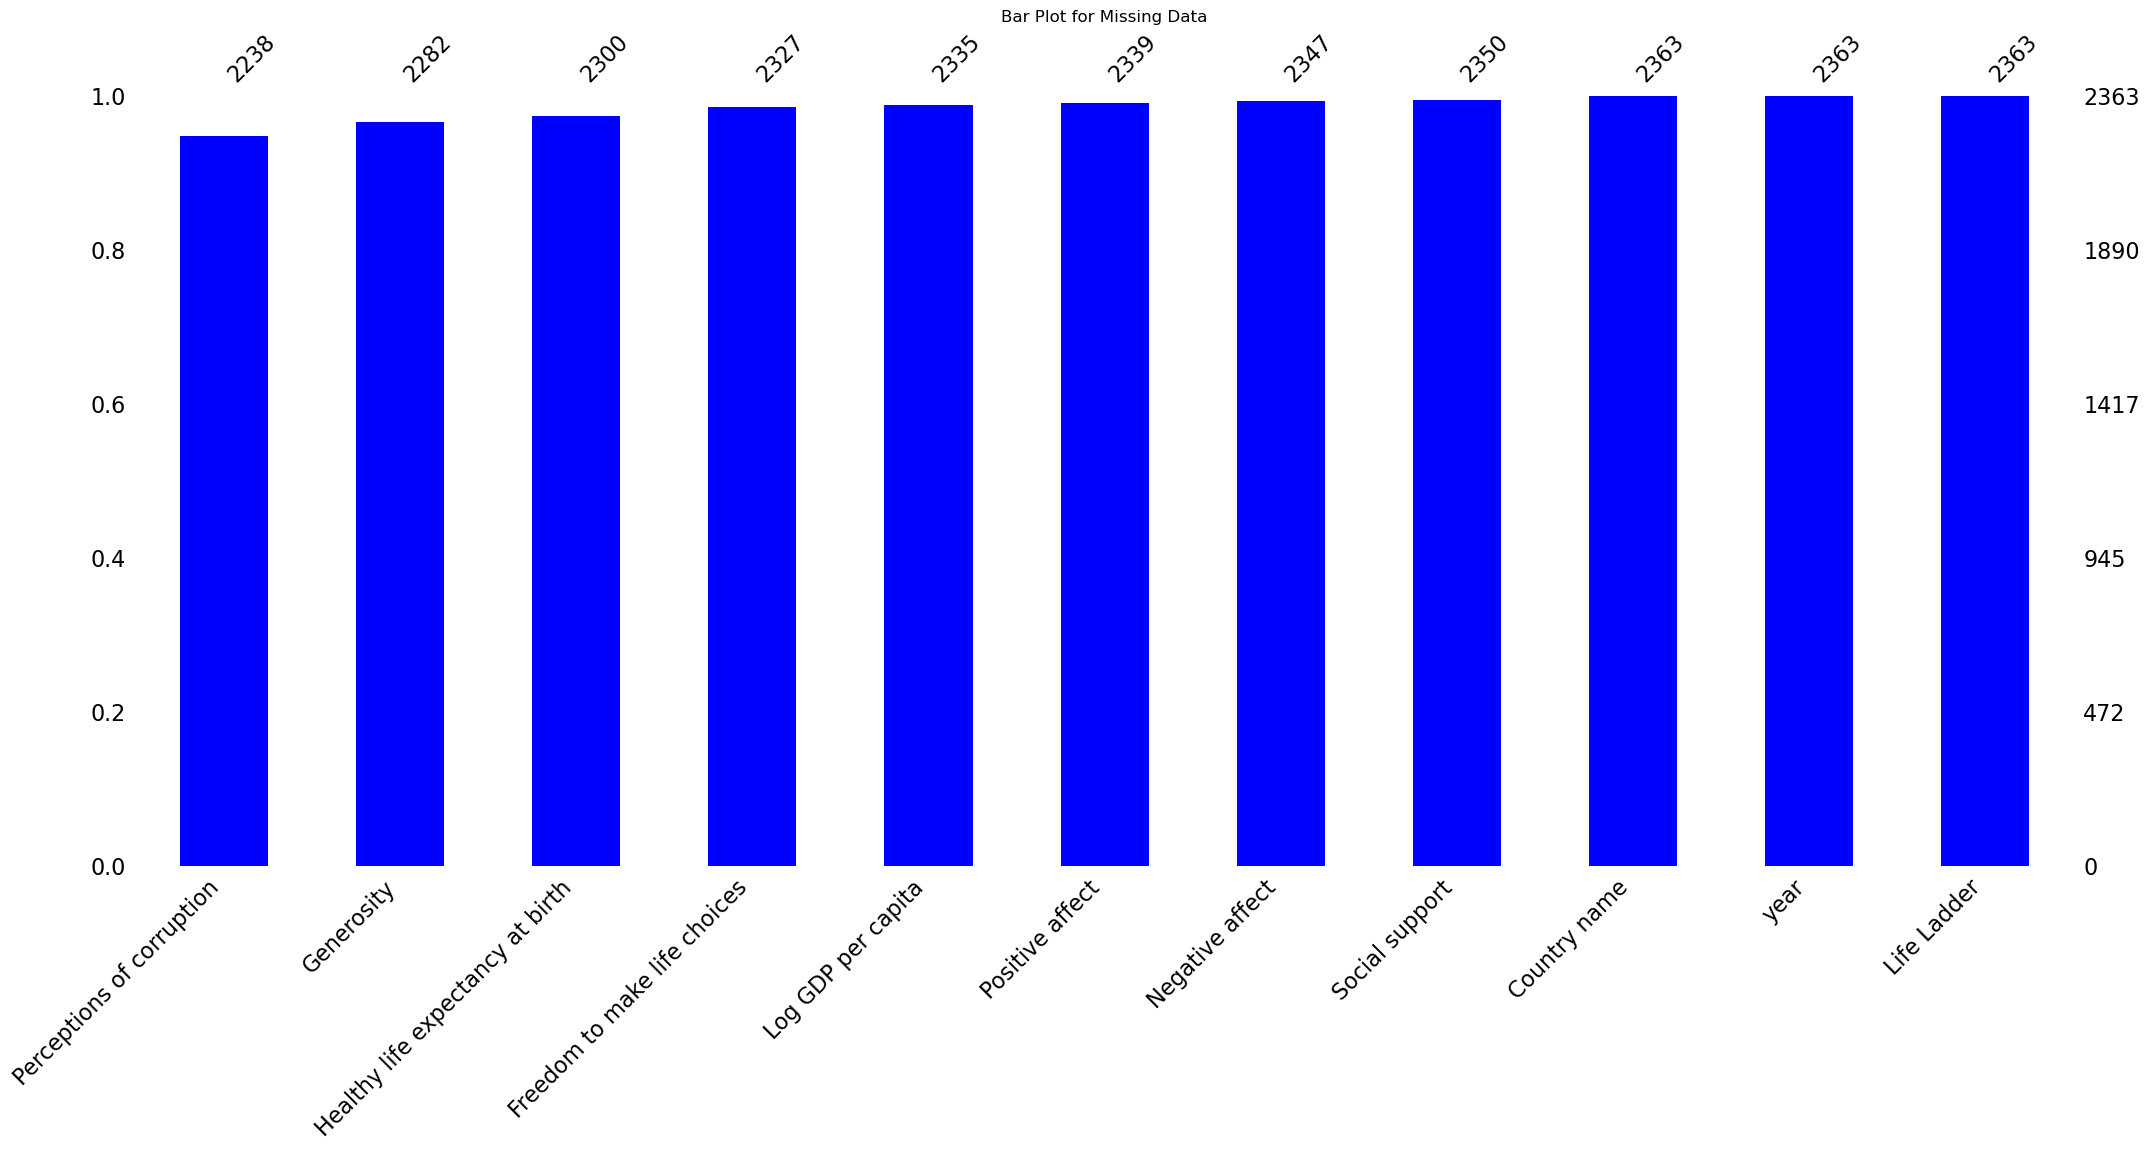

In [20]:
#plotting the bar using the bar fucnction and adding the label for contex
mn.bar(data, sort="ascending", color='blue')
plt.title("Bar Plot for Missing Data")
plt.show()

### Plot for the top ten countries with the highest number of missing data across all columns

In [21]:
#using the groupb clause to group by countries since the data contains countries and year format as seprate entities
grouped_data=data.groupby(['Country name']).mean()

In [22]:
#sorting the data
grouped_data=grouped_data.sort_values(by="Healthy life expectancy at birth",ascending=False)

In [23]:
#getting a feel of the data
grouped_data.head()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Country name,,,,,,,,,,
Japan,2014.444444,6.023611,10.593333,0.899000,73.543333,0.801833,-0.179563,0.686556,0.693500,0.181389
Singapore,2014.312500,6.508063,11.365000,0.880875,72.921250,0.848437,0.064067,0.105143,0.650625,0.167750
Switzerland,2016.307692,7.435692,11.125000,0.935000,72.166154,0.914923,0.096000,0.294462,0.752385,0.188538
South Korea,2014.500000,5.905500,10.545444,0.794278,72.000000,0.650056,-0.049824,0.784944,0.581111,0.227722
Israel,2014.500000,7.238833,10.534278,0.909722,71.900000,0.735611,0.103706,0.810000,0.606611,0.308389


In [24]:
#subset the dataframe to get only the top 20 countries with highest average life expectancy and top countries with lowest life expectancy
highest_life_expectancy=grouped_data.head(20)
lowest_life_expectancy=grouped_data.tail(20)

In [25]:
grouped_data = data.groupby(['Country name']).mean()
grouped_data = grouped_data.reset_index()
# Sort by 'Healthy life expectancy at birth' in descending order
grouped_data = grouped_data.sort_values(by="Healthy life expectancy at birth", ascending=False)
# top 20 countries with the highest life expectancy
highest_life_expectancy = grouped_data.head(20)
# bottom 20 countries with the lowest life expectancy
lowest_life_expectancy = grouped_data.tail(20)
highest_life_expectancy=highest_life_expectancy['Country name'].tolist()
lowest_life_expectancy=lowest_life_expectancy['Country name'].tolist()

In [26]:
highest_expectancy_df= data[data['Country name'].isin (highest_life_expectancy)]
lowest_expectancy_df=data[data['Country name'].isin(lowest_life_expectancy)]

In [27]:
print(highest_expectancy_df)

     Country name  year  Life Ladder  Log GDP per capita  Social support  \
81      Australia  2005        7.341              10.662           0.968   
82      Australia  2007        7.285              10.694           0.965   
83      Australia  2008        7.254              10.709           0.947   
84      Australia  2010        7.450              10.714           0.955   
85      Australia  2011        7.406              10.723           0.967   
...           ...   ...          ...                 ...             ...   
2013  Switzerland  2019        7.694              11.155           0.949   
2014  Switzerland  2020        7.508              11.124           0.946   
2015  Switzerland  2021        7.328              11.158           0.934   
2016  Switzerland  2022        6.884              11.170           0.881   
2017  Switzerland  2023        6.969              11.169           0.904   

      Healthy life expectancy at birth  Freedom to make life choices  \
81             

In [28]:
print(lowest_expectancy_df)

     Country name  year  Life Ladder  Log GDP per capita  Social support  \
42         Angola  2011        5.589               8.944           0.723   
43         Angola  2012        4.360               8.989           0.753   
44         Angola  2013        3.937               9.000           0.722   
45         Angola  2014        3.795               9.010           0.755   
245      Botswana  2006        4.739               9.495           0.883   
...           ...   ...          ...                 ...             ...   
2358     Zimbabwe  2019        2.694               7.698           0.759   
2359     Zimbabwe  2020        3.160               7.596           0.717   
2360     Zimbabwe  2021        3.155               7.657           0.685   
2361     Zimbabwe  2022        3.296               7.670           0.666   
2362     Zimbabwe  2023        3.572               7.679           0.694   

      Healthy life expectancy at birth  Freedom to make life choices  \
42             

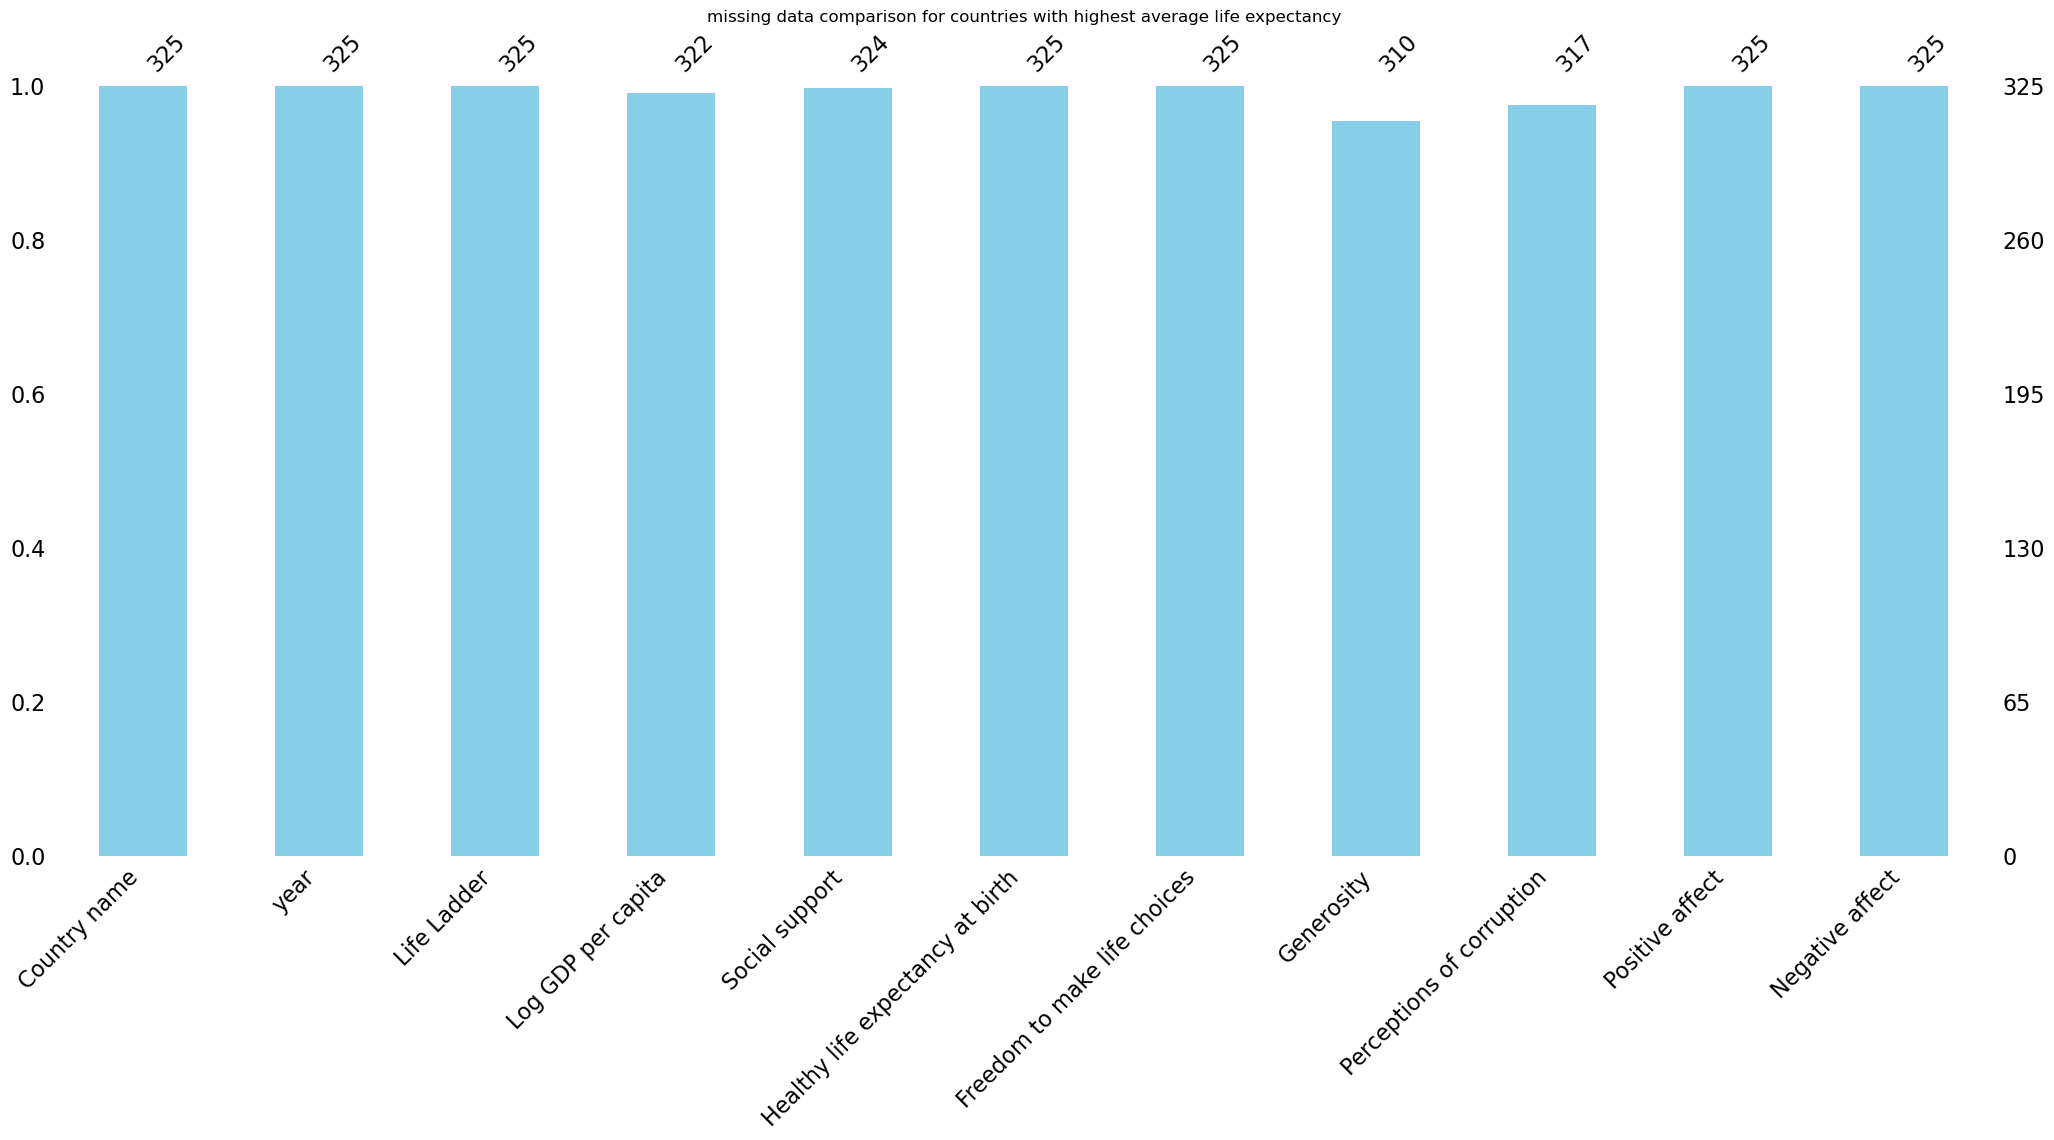

In [29]:
#plotting the missing values for countries with highest life expectancy on average across all the years 
mn.bar(highest_expectancy_df,color="skyblue")
plt.title("missing data comparison for countries with highest average life expectancy")
plt.show()

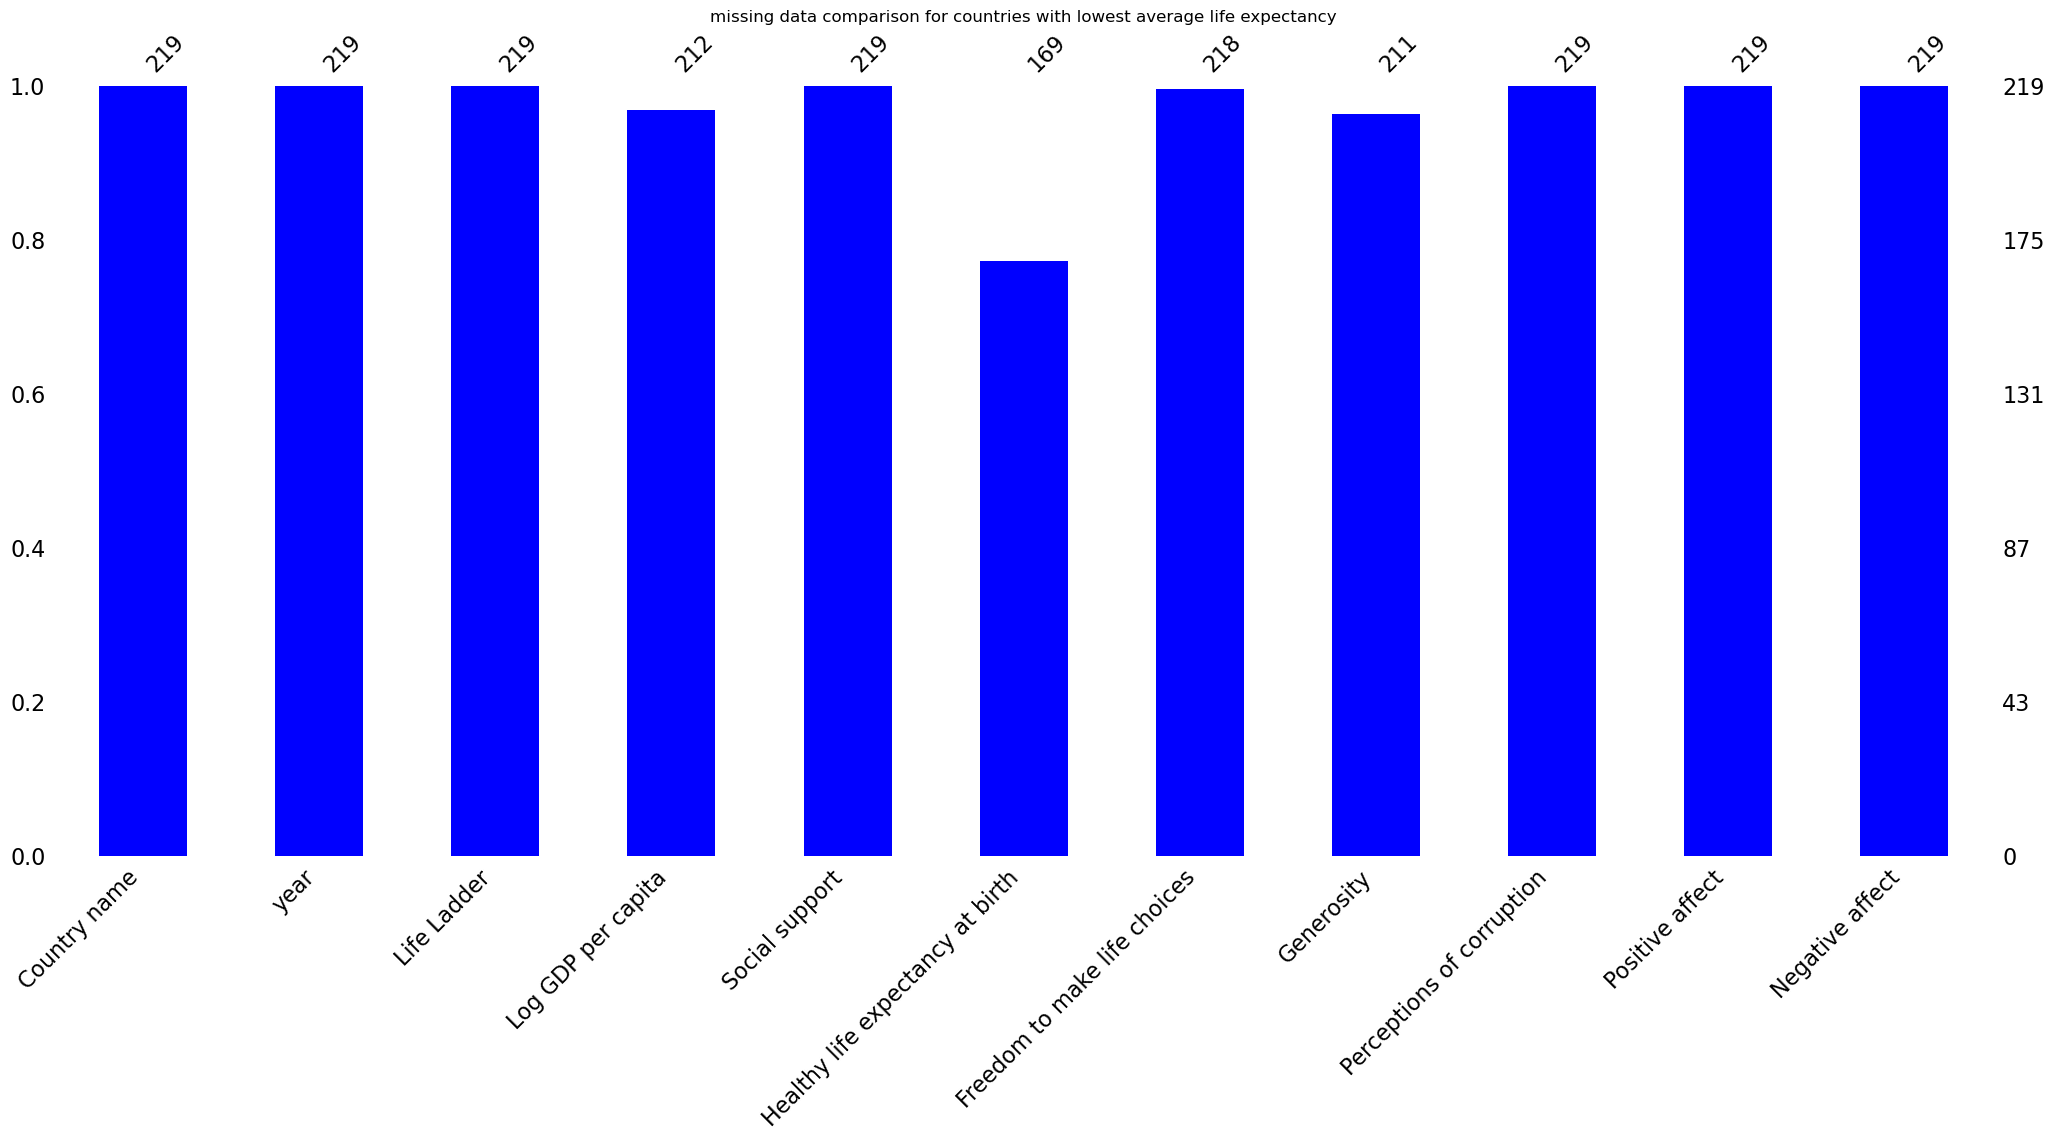

In [30]:
#plotting the same bar chart for countries with lowest life expectancy
mn.bar(lowest_expectancy_df,color="blue")
plt.title("missing data comparison for countries with lowest average life expectancy")
plt.show()

Both of these plots show comparison of the missing data fpr countries with highest mean life expectancy and the countries with lowest mean life expectancy. 

An interesting observation from these graphs was that for countries with lowest life expectancy, healthy life expectancy at birth has the most number of missing data columns whereas for countries with high life expectancy, the same column has no missing values whatsoever


## Heatmap

Heatmaps are also an excellent source for visualizing data as they tend to show the correlation between the missing variables, usually if the variables are correlated together that also means that the missing data has some patterns. This can be done quickly using the heatmap function in the missingno package

<Axes: >

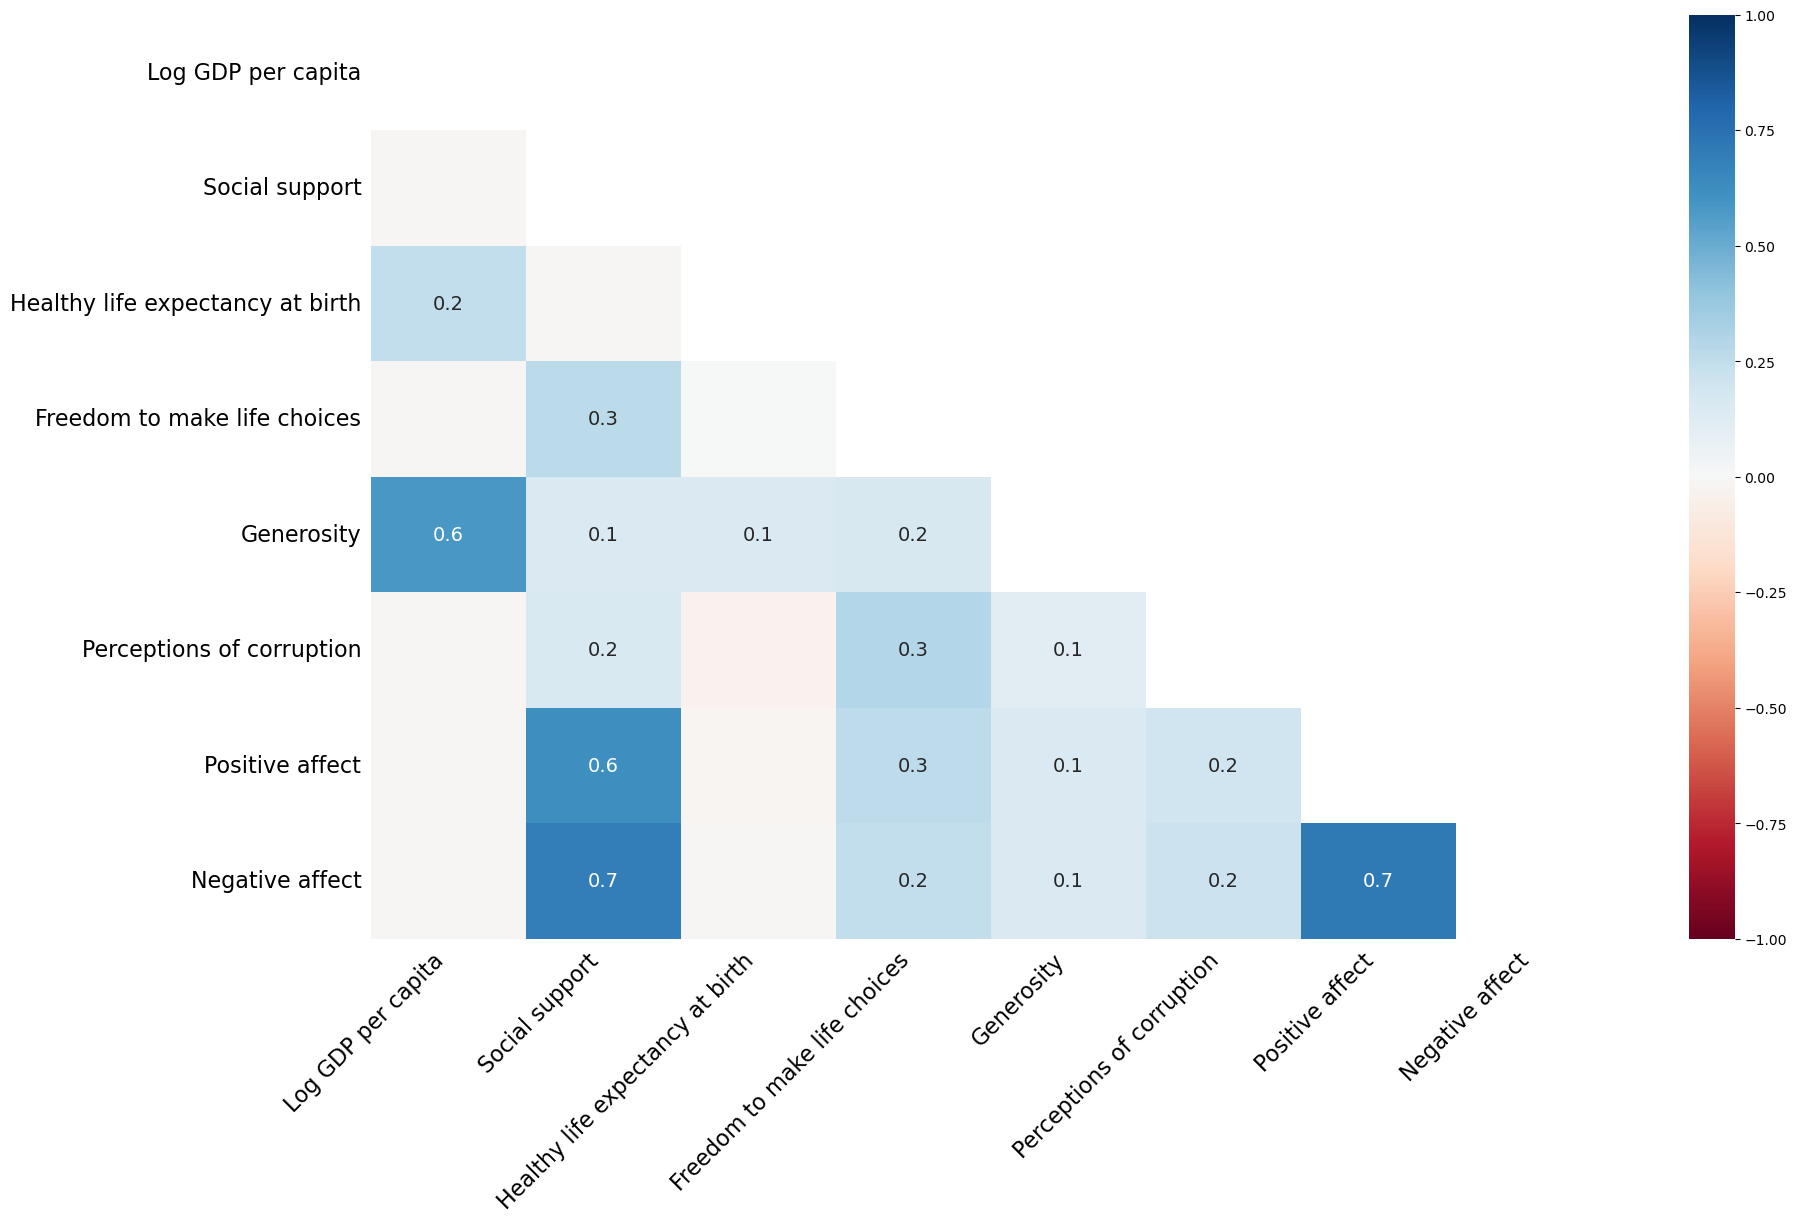

In [32]:
#creating the heatmap 
mn.heatmap(data)


## Dendogram

Denogram is a popular clustering technique which is used to explore the relationship between variables where it clusters the variables based on similarity. In context of missing data, it can help us visualize the relationship between the missing data, telling if there is any patterns beteeen the variables which have missing data

A missing data dendogram creation is relatively simple with the missing no package as we just have to write .dendogram and pass in the data to the function

<Axes: >

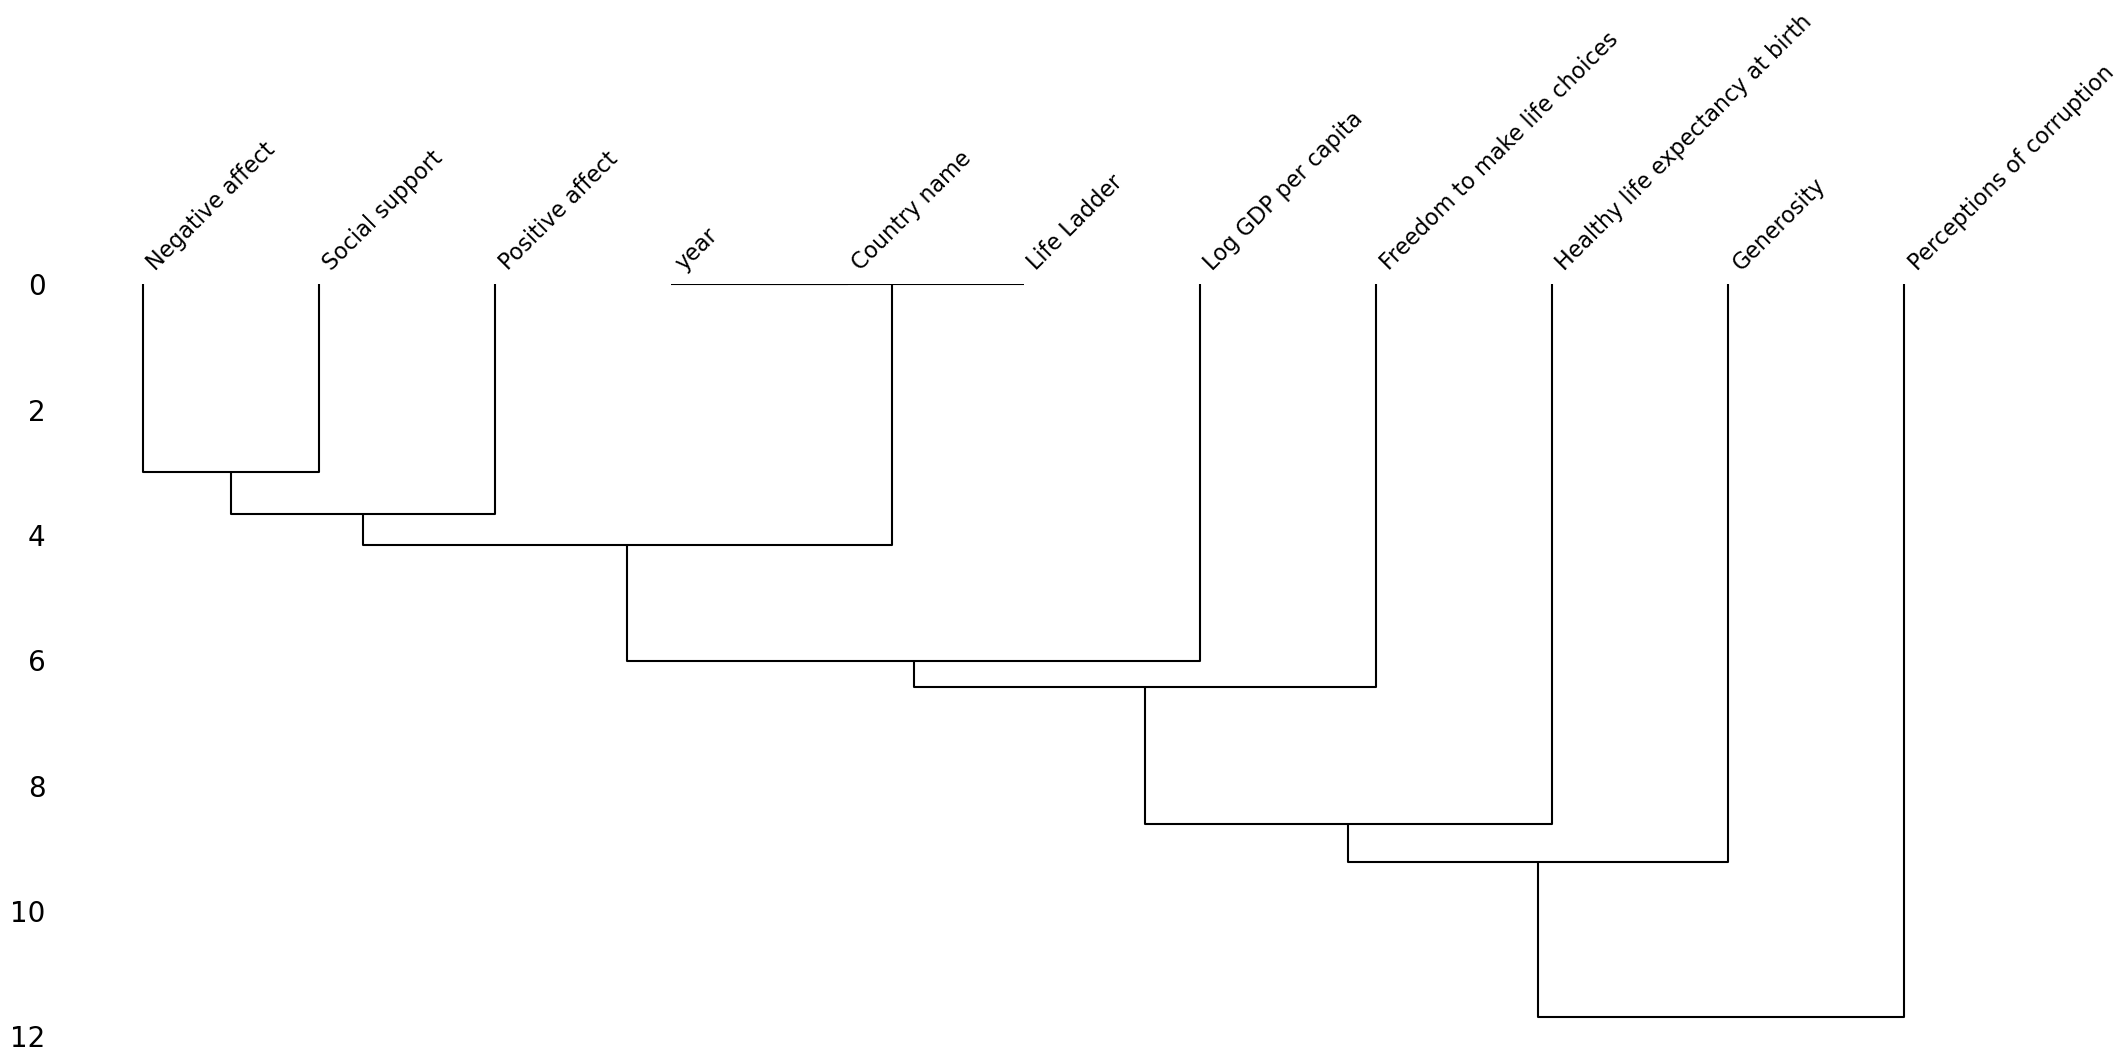

In [33]:
mn.dendrogram(data)